# 🔻 [Return to workflow](#leftoff)

⚓ ANCHOR FOR RETURN TO WORKFLOW LINK <a name="leftoff"></a>

# **Updates Post Presentation DR:**

* W/ covid neg impact on hospitality/tourism, **increased comp for less tourism**


* **Increased focus on perf** - strongest KPI: customer satisfaction


* **Question/problem/goal:** bring scores up to 4.8+ (superhost rating)
    * **Why SH?** Emphasis on guest experience; see [link](https://www.airbnb.com/help/article/829/how-do-i-become-a-superhost#:~:text=Earning%20Superhost%20status-,Superhost%20requirements,-Completed%20at%20least)    
    * **How:** ID top preds for meeting and missing 4.8+


* **SWOT**
    * **S/W:** EDA step; what is right/wrong right now?
    * **O/T:** Predictors and recommendations

# **New Tasks**

**Tasks:**

- [ ] drop na - across all feats/rows
- [ ] check dist of remaining ratings - histplot
- [ ] convert scores: 0-4.799, 4.8+
- [ ] clean data for eda
- [ ] review feats
- [ ] determine S/W
- [ ] split w/ stratify
- [ ] re-model (macro recall/F1)
- [ ] get results
- [ ] visualize results
- [ ] create recommendations


# 🏡 **“ODD” ASPECTS OF AIRBNB** 🏨

# ❌ Update target audience and guiding questions

---

**Who?**
>* 🏢 **AirBNB Corporate** interested in maximizing customer satisfaction to increase repeat guests and encourage new guests to stay with AirBNB hosts
>
>
>* 🏡**AirBNB hosts** interested in maximizing the ratings

**Why?**
>* 💰 **Revenue Management:** 
>
>
>
>* 🤝 **Sales:**
>
>
>
>* 🛌 **Rooms Ops:**

>
>
>

**What?**
>* 🧾 Dataset comprised of... 
>  * different features
>  * reservation records
>  * Source cited in Readme

❌ **How?**
>* Which models/methods?
>* Data prep and feature engineering

---

# 🎯  **Goal:**

Determining whether or not a host location would receive a score greater than or equal to 4/5 (defined by `'review_scores_rating'`).

# 📂 **Imports and Settings**

In [1]:
## Data Handling
import pandas as pd
import numpy as np
from scipy import stats


## Visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact_manual
import missingno

## SKLearn
from sklearn.preprocessing import Binarizer, MultiLabelBinarizer, \
                                    OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,\
                                    RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, \
                                AdaBoostClassifier,GradientBoostingClassifier 
from sklearn import set_config
set_config(display='diagram')

from imblearn.over_sampling import SMOTE,SMOTENC


## Settings
%matplotlib inline
plt.style.use('seaborn-talk')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('max_rows', 100)

In [2]:
## Personal functions
import clf_functions.functions as cf

## Tools to reload personal functions when called - prevents errors
%load_ext autoreload
%autoreload 1
%aimport clf_functions.functions

## ✅ Show Visualizations Setting

In [3]:
## Setting to control whether or not to show visualizations
show_visualizations = False

# 📖 **Read Data**

In [4]:
## Reading data and saving to a DataFrame

source = 'data/listings.csv.gz'

data = pd.read_csv(source)

In [5]:
## Inspecting imported dataset
data.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,nan,38.86,-76.99,Private room in house,Private room,1,nan,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,nan,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",nan,38.91,-77.00,Private room in townhouse,Private room,2,nan,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",nan,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",nan,38.91,-76.94,Private room

In [6]:
## Checking number of rows and columns
data.shape

(8033, 74)

---

> The initial read of the dataset shows there are 74 features and 8,033 entries. A quick glance at the `.head()` gives a sample of the entries, showing that some of the features are not relevant to my analysis.
>
> I need to get a better idea of the statistics for the dataset, especially any missing values and the datatypes for each column. I need to pre-process this data before I can perform any modeling.

---

# 👨‍💻 **Interactive Investigation**

---

> To increase accessibility to the data, **I include a widget to allow the user to sort through the data interactively.** I use [**Jupyter Widgets**](https://ipywidgets.readthedocs.io/en/latest/index.html) to create this interactive report.
>
>**To use:** select which column by which you would like to sort from the dropdown menu, then click the "Run Interact" button.
>
>***Note about 'Drop_Cols' and Cols:*** these keyword arguments are used to allow the user to drop specific columns.
>
> **Only click the "Drop_Cols" option when specifying "Cols"!** Otherwise it will cause an error.
>
>The 'Cols' dropdown menu does not affect the resulting report; the data is filtered from the report prior to displaying the results. 
>
>I chose to include this option for flexibility and adaptability, but it does have the unintended consequence of creating another drop-down menu. Please ignore this menu, as it does not provide any additional functionality. For future work, I will disable the menu to prevent confusion.

---

In [7]:
## Running report on unfiltered dataset

interact_manual(cf.sort_report, Sort_by=list(cf.report_df(data).columns),
                Source=source);

interactive(children=(Text(value='data/listings.csv.gz', description='Source'), Dropdown(description='Sort_by'…

In [8]:
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,nan,38.86,-76.99,Private room in house,Private room,1,nan,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,nan,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",nan,38.91,-77.00,Private room in townhouse,Private room,2,nan,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",nan,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",nan,38.91,-76.94,Private room

---

> After reviewing my data, I see there are several features that contain irrelevant entries (URLs, source data, meta data) or values that are too complicated for simple processing (such as host and listing descriptions).
>
> I will drop these columns for the second report to review the remaining data for further processing.

---

In [9]:
## Specifying columns to drop

drop = ['id', 'host_id', 'name', 'description', 'neighborhood_overview', 'host_name',
        'host_about', 'host_location', 'neighbourhood', 'property_type',
        'listing_url', 'scrape_id', 'last_scraped', 'picture_url','host_url',
        'host_thumbnail_url','host_picture_url','calendar_last_scraped']

In [10]:
## Creating updated interactive report

interact_manual(cf.sort_report, Drop_Cols = True, Cols = drop,
                Sort_by=list(cf.report_df(data).columns), Source=source);

interactive(children=(Text(value='data/listings.csv.gz', description='Source'), Dropdown(description='Sort_by'…

---

> **Interpretation:**
>
> The report shows that the dataset has a big problem with missing values:
>
> * **Empty:**
>   * `neighbourhood_group_cleansed`
>   * `bathrooms`
>   * `calendar_updated`
>
>
> * **Nearly empty:**
>  * `license`
>
>
> * **Missing 26-39% of data:**
>  * `host_about`
>  * `neighborhood_overview`
>  * `neighbourhood`
>  * `host_response_time`
>  * `host_response_rate`
>  * `review_scores_value`
>  * `review_scores_checkin`
>  * `review_scores_location`
>  * `review_scores_accuracy`
>  * `review_scores_communication`
>  * `review_scores_cleanliness`
>  * `host_acceptance_rate`
>  * `reviews_per_month`
>  * `first_review`
>  * `review_scores_rating`
>  * `last_review`
>
>---
>
> I will need to address these missing values before processing with the modeling. A few options include:
>
> * **Filling with the string "missing"** to indicate the value was missing.
>    * *I would be able to treat "missing" as a distinct category and use it for modeling as well.*
>
>
> * **Dropping the rows with missing values.**
>    * *This may negatively impact the accuracy of my results by overfitting to the training data.*
>
>
> * I could **use the `SimpleImputer` tool from SKLearn to fill the missing values** with the mean, median, or mode values for each.
>    * *I could couple this with a `GridSearchCV` to identify the method that has the strongest positive impact on my classification metrics.*

---

---

> To get a better idea of the missing values, I create a visual of the values via the 'Missingno' package. This visualization package includes several options for visualizing the missing data.

---

In [11]:
## Visually inspecting missing values
if show_visualizations == True:
    missingno.bar(data, labels=True);

---

> Based on this visualization, I see that **there is a consistent trend in missing values for review scores:** if a row is missing one review score, it seems to be missing all of them.
>
> Additionally, **there are many missing values for the response time, response rate, and acceptance rate.** I want to use these columns in my classification, so I will need to replace those missing values.
>
> After reviewing these details, **I feel more comfortable with the option of dropping those rows with missing review values.** I will drop the values as part of my overall classification process.

---

# 🧼 **Data Cleaning and EDA**

## 🔎 Fixing Missing Values

---

> This dataset is missing a significant number of values for different columns. **In order to perform any modeling, I will need to address these missing values first.**
>
> Depending on the feature and the number of missing values per row, I will take different approaches to keep as much data as possible and in its original state.

---

In [12]:
# Dropping features with high percentages (25%+) of missing values

drop_na_cols = []
for col in data.columns:
    if ((data[col].isna().sum()) / len(data[col])) > .25 and col != 'review_scores_rating':
        drop_na_cols.append(col)

drop_na_cols

['neighborhood_overview',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'first_review',
 'last_review',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

In [13]:
## Appending previous list of columns to drop (metadata, etc.)

for col in drop:
    if col not in drop_na_cols:
        drop_na_cols.append(col)

drop_na_cols

['neighborhood_overview',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'first_review',
 'last_review',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month',
 'id',
 'host_id',
 'name',
 'description',
 'host_name',
 'host_location',
 'property_type',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'calendar_last_scraped']

In [14]:
## Creating new dataframe that does not include the features to drop
df = data.drop(columns= drop_na_cols).copy()
df

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2008-11-26,f,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,t,1,31,61,336,75,3,0,4.59,f,2,0,2,0
1,2008-12-12,f,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",t,9,39,69,344,429,0,0,4.82,f,2,0,2,0
2,2008-12-30,f,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Eastland Gardens, Kenilworth",38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",$54.00,30,180,30,30,180,180,30.00,180.00,t,29,59,89,179,102,0,0,4.66,f,1,0,1,0
3,2009-01-26,t,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.99,Private room,1,3 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$99.00,2,365,2,2,365,365,2.00,365.00,t,0,0,0,146,31,0,0,4.74,f,3,0,3,0
4,2009-01-13,f,Adams Morgan,4.00,4.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,3,1 bath,1.00,1.00,"[""Window guards"", ""Cooking basics"", ""First aid...",$86.00,5,150,5,23,150,150,8.80,150.00,t,7,32,62,121,95,0,0,4.54,f,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,2020-08-03,f,Southeast Washington,0.00,0.00,"['email', 'phone']",t,f,"Congress Heights, Bellevue, Washington Highlands",38.83,-77.00,Entire home/apt,8,1 bath,3.00,3.00,"[""First aid kit"", ""Dedicated workspace"", ""Smok...",$400.00,2,2,2,2,1125,1125,2.00,"1,125.00",t,17,43,73,348,0,0,0,nan,t,1,1,0,0
8029,2020-07-29,f,East Forest,125.00,125.00,"['email', 'phone']",t,t,"Howard University, Le Droit Park, Cardozo/Shaw",38.92,-77.02,Entire home/apt,5,2 baths,2.00,nan,"[""Cooking basics"", ""Lockbox"", ""Long term stays...",$198.00,90,365,90,90,365,365,90.00,365.00,t,30,60,90,365,0,0,0,nan,t,215,215,0,0
8030,2016-04-27,f,Near Northeast/H Street Corridor,32.00,32.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,2,1 bath,1.00,2.00,"[""Cooking basics"", ""Shampoo"", ""Dedicated works...",$70.00,30,1125,30,30,1125,1125,30.00,"1,125.00",t,30,60,90,364,0,0,0,nan,f,30,30,0,0
8031,2020-09-23,f,Cherry Creek,"2,232.00","2,232.00","['email', 'phone']",t,t,"Shaw, Logan Circle",38.91,-77.03,Entire home/apt,3,1 bath,1.00,nan,"[""Cooking basics"", ""Elevator"", ""Lockbox"", ""Lon...",$223.00,91,365,91,91,365,365,91.00,365.00,t,30,60,90,365,0,0,0,nan,t,50,50,0,0


In [15]:
## Inspecting values prior to dropping
cf.report_df(df)

,null_sum,null_pct,datatypes,num_unique,count,mean,std,min,25%,50%,75%,max
host_since,136,0.02,object,2415,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,136,0.02,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,741,0.09,object,183,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,136,0.02,float64,57,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_total_listings_count,136,0.02,float64,57,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_verifications,0,0.00,object,297,nan,nan,nan,nan,nan,nan,nan,nan
host_has_profile_pic,136,0.02,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,136,0.02,object,2,nan,nan,nan,nan,nan,nan,nan,nan
neighbourhood_cleansed,0,0.00,object,39,nan,nan,nan,nan,nan,nan,nan,nan
latitude,0,0.00,float64,5113,"8,033.00",38.91,0.02,38.82,38.90,38.91,38.92,39.00


# Dropping Rows W/O Target

In [16]:
## Checking for rows missing target values

nan_index = df['review_scores_rating'].isna()
nan_index

0       False
1       False
2       False
3       False
4       False
        ...  
8028     True
8029     True
8030     True
8031     True
8032     True
Name: review_scores_rating, Length: 8033, dtype: bool

In [17]:
## Inspecting rows to be dropped for missing the target feature
df[nan_index]

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
40,2011-07-22,f,Manor Park,2.00,2.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Takoma, Brightwood, Manor Park",38.96,-77.02,Private room,1,1.5 shared baths,1.00,4.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$399.00,1,730,1,1,730,730,1.00,730.00,t,30,60,90,365,0,0,0,nan,f,2,1,1,0
70,2012-01-25,f,Near Northeast,2.00,2.00,"['email', 'phone']",t,f,"Union Station, Stanton Park, Kingman Park",38.90,-77.00,Entire home/apt,4,2 baths,2.00,2.00,"[""Refrigerator"", ""Long term stays allowed"", ""C...",$125.00,5,1125,5,5,1125,1125,5.00,"1,125.00",t,17,38,68,343,0,0,0,nan,f,2,2,0,0
80,2012-04-24,f,Logan Circle,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.91,-77.03,Entire home/apt,1,1.5 baths,1.00,1.00,"[""Elevator"", ""Cable TV"", ""TV with standard cab...",$99.00,150,1125,150,150,1125,1125,150.00,"1,125.00",t,29,59,89,364,0,0,0,nan,f,1,1,0,0
120,2009-11-26,f,Capitol Hill,1.00,1.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Capitol Hill, Lincoln Park",38.89,-76.99,Entire home/apt,6,NaN,3.00,nan,[],"$2,000.00",4,4,4,4,4,4,4.00,4.00,t,30,60,90,365,0,0,0,nan,f,1,1,0,0
145,2013-04-24,f,Adams Morgan,1.00,1.00,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,2,2 baths,2.00,2.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$120.00,180,180,180,180,180,180,180.00,180.00,f,0,0,0,0,0,0,0,nan,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,2020-08-03,f,Southeast Washington,0.00,0.00,"['email', 'phone']",t,f,"Congress Heights, Bellevue, Washington Highlands",38.83,-77.00,Entire home/apt,8,1 bath,3.00,3.00,"[""First aid kit"", ""Dedicated workspace"", ""Smok...",$400.00,2,2,2,2,1125,1125,2.00,"1,125.00",t,17,43,73,348,0,0,0,nan,t,1,1,0,0
8029,2020-07-29,f,East Forest,125.00,125.00,"['email', 'phone']",t,t,"Howard University, Le Droit Park, Cardozo/Shaw",38.92,-77.02,Entire home/apt,5,2 baths,2.00,nan,"[""Cooking basics"", ""Lockbox"", ""Long term stays...",$198.00,90,365,90,90,365,365,90.00,365.00,t,30,60,90,365,0,0,0,nan,t,215,215,0,0
8030,2016-04-27,f,Near Northeast/H Street Corridor,32.00,32.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,2,1 bath,1.00,2.00,"[""Cooking basics"", ""Shampoo"", ""Dedicated works...",$70.00,30,1125,30,30,1125,1125,30.00,"1,125.00",t,30,60,90,364,0,0,0,nan,f,30,30,0,0
8031,2020-09-23,f,Cherry Creek,"2,232.00","2,232.00","['email', 'phone']",t,t,"Shaw, Logan Circle",38.91,-77.03,Entire home/apt,3,1 bath,1.00,nan,"[""Cooking basics"", ""Elevator"", ""Lockbox"", ""Lon...",$223.00,91,365,91,91,365,365,91.00,365.00,t,30,60,90,365,0,0,0,nan,t,50,50,0,0


In [18]:
## Dropping rows from main dataframe
df.drop(df[nan_index].index, inplace=True)

In [19]:
cf.report_df(df)

,null_sum,null_pct,datatypes,num_unique,count,mean,std,min,25%,50%,75%,max
host_since,10,0.00,object,2164,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,10,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,488,0.08,object,169,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,10,0.00,float64,48,"5,816.00",43.93,206.60,0.00,1.00,2.00,4.00,"1,683.00"
host_total_listings_count,10,0.00,float64,48,"5,816.00",43.93,206.60,0.00,1.00,2.00,4.00,"1,683.00"
host_verifications,0,0.00,object,269,nan,nan,nan,nan,nan,nan,nan,nan
host_has_profile_pic,10,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,10,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
neighbourhood_cleansed,0,0.00,object,39,nan,nan,nan,nan,nan,nan,nan,nan
latitude,0,0.00,float64,4077,"5,826.00",38.91,0.02,38.82,38.90,38.91,38.92,38.99


# Inspecting Review Ratings

---

> Now that I dropped most of my missing values, I review the distribution of my ratings.
>
> Our target threshold score is 4.8/5.0, 

---


In [21]:
df['review_scores_rating'].isna().sum()

0

In [22]:
## Inspecting the totals for each range of values

df['review_scores_rating'].value_counts(dropna=False, bins=25, sort=False,
                                          normalize = True)

(-0.006, 0.2]   0.01
(0.2, 0.4]      0.00
(0.4, 0.6]      0.00
(0.6, 0.8]      0.00
(0.8, 1.0]      0.00
(1.0, 1.2]      0.00
(1.2, 1.4]      0.00
(1.4, 1.6]      0.00
(1.6, 1.8]      0.00
(1.8, 2.0]      0.00
(2.0, 2.2]      0.00
(2.2, 2.4]      0.00
(2.4, 2.6]      0.00
(2.6, 2.8]      0.00
(2.8, 3.0]      0.01
(3.0, 3.2]      0.00
(3.2, 3.4]      0.00
(3.4, 3.6]      0.00
(3.6, 3.8]      0.01
(3.8, 4.0]      0.02
(4.0, 4.2]      0.01
(4.2, 4.4]      0.03
(4.4, 4.6]      0.09
(4.6, 4.8]      0.21
(4.8, 5.0]      0.59
Name: review_scores_rating, dtype: float64

4.75   0.02
5.00   0.26
4.50   0.02
4.00   0.02
0.00   0.01
       ... 
4.11   0.00
4.28   0.00
4.49   0.00
4.40   0.00
4.95   0.02
Name: review_scores_rating, Length: 118, dtype: float64

# Inspecting Review Ratings

In [45]:
df['review_scores_rating'].value_counts(bins = 25, dropna=False, sort=False,
                                        normalize=True)[-1:]

(4.8, 5.0]   0.59
Name: review_scores_rating, dtype: float64

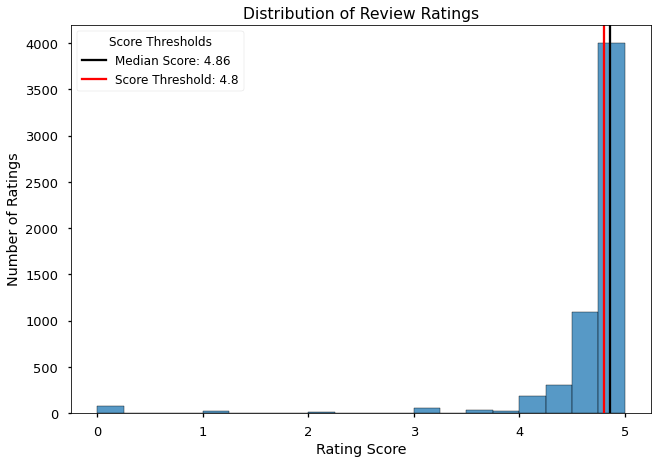

In [29]:
## Visualizing the distribution of ratings

ax = sns.histplot(data = data['review_scores_rating'], bins = 20)

ax.set(title = 'Distribution of Review Ratings',
       xlabel = 'Rating Score', ylabel = 'Number of Ratings')

median = df['review_scores_rating'].median()

ax.axvline(median, label = f'Median Score: {median}', color='k')

ax.axvline(4.8, label = 'Score Threshold: 4.8', color='red')

ax.legend(fontsize= 'large',title = 'Score Thresholds',
          title_fontsize = 'large');

---

> Based on the results above, I see that **59% of the reviews are at or below our target threshold of 4.8.**
>
> These scores show that there's a reasonable balance of scores that are meeting our threshold for being a Superhost vs. those that are not. This balance is very important for the modeling process later in my workflow.

---

## Filling Beds

In [ ]:
## Filling missing values for 'beds' with values for 'bedrooms'

for idx in list(df['beds'][df['beds'].isna()].index):
    if df['bedrooms'][idx] > 0:
        df['beds'][idx] = df['bedrooms'][idx]

In [ ]:
## Filling missing values for 'bedrooms' with values for 'beds'

for idx in list(df['bedrooms'][df['bedrooms'].isna()].index):
    if df['beds'][idx] > 0:
        df['bedrooms'][idx] = df['beds'][idx]

In [ ]:
## Confirming reduction in missing values for 'beds' and 'bedrooms'

rpt_clean  = cf.report_df(df)
rpt_clean[rpt_clean['null_sum'] >0]

In [ ]:
## Removing rows with 6+ null values

df = df[df.isna().sum(axis=1) < 6]
df.head(5)

In [ ]:
## Reviewing remaining 

df.isna().sum()[df.isna().sum() > 0]

In [ ]:
cf.report_df(df)

In [ ]:
## Resetting the index after dropping rows

df.reset_index(drop=True, inplace=True)

In [ ]:
print(len(df) == len(df.index),"\n")
print(len(df),len(df.index))

---

> At this point, **I cleaned up most of the null values via dropping columns with 25%+ missing values and dropping rows with 6+ missing values.**
>
>Additionally, **I filled missing values for 'beds'/'bedrooms' by checking the missing values for each column against the values in the other for each row.** If a row had a value in one of the columns but not the other, I filled the missing value with the value from the other column.
>
> At this point, I addressed most of the missing values in my dataset by dropping columns and filling missing values. There are still a few columns with missing values, but I will use a SimpleImputer combined with a GridSearchCV to determine the best method by which to fill those values.
>
> Now I will review the remaining data and determine if there are any other issues with my data.

---

In [ ]:
len(df) == len(df.index)

# **COMMENT:** What else to clean?? 

* DONE: T/F columns to 1/0


* DONE: 'host_since' to DT


* DONE: 'price' -$, to float


* DONE: 'neighbourhood_cleansed' split on ", " and convert to binary columns, then drop host_neighbourhood


* DONE: 'bathrooms_text' split on space, keep 1st part, convert to int


* 'host_verifications' - single string, needs extensive work in order to MLB

## Converting True/False Columns to Binary Values

In [ ]:
## Creating list of true/false features to convert to 1/0, respectively

t_f_xf = ['host_is_superhost','host_has_profile_pic','host_identity_verified',
          'has_availability','instant_bookable']
t_f_xf

In [ ]:
## Converting datatype to "string" to replace values

df[t_f_xf] = df[t_f_xf].astype('str')
df[t_f_xf].dtypes

In [ ]:
df[t_f_xf]

In [ ]:
## Converting t/f to 1/0, respectively

df[t_f_xf] = df[t_f_xf].replace({ 't' : 1, 'f' : 0})

In [ ]:
df[t_f_xf]

In [ ]:
df[t_f_xf] = df[t_f_xf].astype(int)

In [ ]:
## Verifying results

cf.report_df(df[t_f_xf])

## Converting Price to Float 

In [ ]:
## Converting each value into a float for processing

df['price'] = df['price'].map(lambda price: price[1:].replace(',','')).astype('float')
df['price'][0]

In [ ]:
df['price'].describe()

## Creating "Years_Hosting"

---

> Since the 'host_since' feature is clearly a date, I will create a separate feature for how many years of activity for each host.

---

In [ ]:
df['years_hosting'] = df["host_since"].map(lambda x: 2021- int(x.split("-")[0]))
df['years_hosting']

In [ ]:
df['years_hosting'].value_counts()

In [ ]:
df['years_hosting'].describe()

---

> I successfully created the new feature to represent how long each host is active (up to 2021). I will be curious to see the impact of the years of experience on the overall rating at the end of my modeling process.

---

## Bathrooms_Text to Num_Bathrooms

---

> In the raw data, the original "bathrooms" feature was empty and was dropped as part of processing missing data.
>
> **My goal is to convert the "bathrooms_text" feature into a new "num_bathrooms" feature to indicate the number of bathrooms at a host property.**
>
> I assume the number of bathrooms would have an impact on the rating . More bathrooms could mean more space/comfort for the guest, but could also cause an increase in price.


---

In [ ]:
## Checking current dataframe contents
df.head(3)

In [ ]:
## Checking for null values overall
df.isna().sum()[df.isna().sum() > 0]

In [ ]:
## Inspecting a selection of values from the column to understand the values
df.loc[:,'bathrooms_text'][:21]

In [ ]:
## Inspecting the rows in which there are null values
df[df['bathrooms_text'].isna()]

In [ ]:
## Filling null values with unique string ('Baths' not present otherwise)
## Unique string can be used later to check for any other zero baths

df.loc[:,'bathrooms_text'].fillna('0 Baths', inplace=True)

In [ ]:
## Verifying all null values are filled
df.isna().sum()[df.isna().sum() > 0]

In [ ]:
df.loc[:,'bathrooms_text'].isna().sum()

In [ ]:
## Splitting each list into separate strings
df['num_bathrooms'] = df['bathrooms_text'].map(lambda x: x.split(' ')[0])
df['num_bathrooms'].value_counts()

In [ ]:
## Inspecting results that are phrases, not numbers

replace = ['Half-bath', 'Shared', 'Private']

for x in df['bathrooms_text']:
    for i in replace:
        if i in x:
            print(x)

---

> **I will replace these values with the numeric value .5 as they are half-baths.** This will allow me to convert the column datatype to a float and use the column more easily in my modeling.

---

In [ ]:
## Replacing string values with .5 to represent half-bathrooms

replace = {'Half-bath': .5, 'Shared': .5, 'Private': .5}

df['num_bathrooms'].replace(replace, inplace = True)

df['num_bathrooms'] = df['num_bathrooms'].astype(float)

In [ ]:
## Inspecting resulting values

df['num_bathrooms'].value_counts(dropna=False)

In [ ]:
## Inspecting listings with more than 10 rooms

df[df['num_bathrooms'] >10]

---

> After taking a look at the locations listed above on Google Maps (using their latitude/longitude), I feel like these three listings with more than 10 bathrooms are either duplicates or incorrect values (for 50 baths).
>
> Due to the questionable nature of these values, I will drop these rows to prevent these outliers from impacting my results.

---

In [ ]:
## Inspecting rows where 'num_bathrooms' is zero to validate data

df[df['num_bathrooms'] ==0]

In [ ]:
## Removing old column post-conversion

df = df.drop(columns = 'bathrooms_text')

In [ ]:
## Confirming removal

'bathrooms_text' in df.columns

---

> My review of the original bathroom text for the zero bathrooms column shows that the listings are associated with a private room. This would make sense as the listings may not include an option such as a shared bath, etc..
>
> Additionally I did fill 9 instances of missing values with "0 Baths," which would contribute slightly to this count.
>
> Overall, I feel the data is valid and I will use it for my modeling.

---

## Cleaning Room_Type

In [ ]:
df['room_type'].value_counts()

In [ ]:
replace_rooms = {'Entire home/apt': 'entire_home', 
                 'Private room': 'private_room',
                 'Shared room': 'shared_room',
                 'Hotel room': 'hotel_room'
                }

df['room_type'].replace(replace_rooms, inplace=True)
df['room_type'].value_counts(dropna=False)

## Binarizing Neighbourhood_Cleansed

---

> The current values for "neighbourhood_cleansed" are a single string value. **I will separate each neighborhood and convert them into a binary column to represent whether or not that neighborhood is included in the listing, then drop the old column.**

---

In [ ]:
## Inspecting feature
df.loc[:,'neighbourhood_cleansed']

In [ ]:
## Identifying datatype
df.loc[:,'neighbourhood_cleansed'].dtype

In [ ]:
## Testing the splitting between neighborhoods

df.loc[:,'neighbourhood_cleansed'][1].split(', ')

In [ ]:
## Converting values into a list of strings of neighborhoods

df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'] \
                                    .apply(lambda x: x.split(', '))

display(df.loc[:,'neighbourhood_cleansed'])

---

> The following code snippet is adapted from [here](https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list#:~:text=Sparse%20solution%20(for%20Pandas%20v0.25.0%2B)) by the user [Maxu](https://stackoverflow.com/users/5741205/maxu).

---

In [ ]:
## Converting each neighborhood into a binary column and dropping old column

mlb = MultiLabelBinarizer()

df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('neighbourhood_cleansed')),
                              columns=mlb.classes_,index=df.index))

In [ ]:
## Inspecting results

df.head(3)

---

> After using the MultiLabelBinarizer, I successfully added a column for each neighborhood, indicating whether or not that neighborhood was included in the listing.
>
> This enables me to use the presence/absence of a  neighborhood as a category in my modeling.

---

## Host_Verifications to Binary Columns

---

> For the "host_verifications" and "amenities" features, the values are a single string with several items within the string.
>
> It is somewhat similar to the "neighborhoods_cleaned" feature in the sense that I will need to filter out the individual items from the string. However, there is an added complication as I need to remove the brackets and quotations from the strings.
>
> Once I filter out the items, I will be able to use the MultiLabelBinarizer again to create more categories for each amenity.

---

In [ ]:
## Inspecting contents
df['host_verifications'][:10]

In [ ]:
## Testing the splitting between items

df.loc[:,'host_verifications'][1]

In [ ]:
## Removing e'host_verifications'tra characters and splitting items

df['host_verifications'] = df['host_verifications'].str.replace('[', '')
df['host_verifications'] = df['host_verifications'].str.replace(']', '')
df['host_verifications'] = df['host_verifications'].str.replace("'", '')
df['host_verifications'] = df['host_verifications'].str.replace('"', '')
df['host_verifications'] = df['host_verifications'].apply(lambda x: x.split(', '))

In [ ]:
df['host_verifications']

In [ ]:
## Converting each value into a binary column and dropping old column

mlb2 = MultiLabelBinarizer()
    
df = df.join(pd.DataFrame(mlb2.fit_transform(df.pop('host_verifications')),
                                  columns=mlb2.classes_,index=df.index))

df

---

> At this point, I successfully processed the 'host_verification' feature into distinct categories for modeling.
>
> In the future, I may attempt to do the same for the 'amenities' feature, but I don't want to create too many columns before my initial modeling.

---

## ❌ ERROR ❌ Binarizing Room_Type

---

> **Can't get MLB/OHE to work for individual property types.**

---

In [ ]:
# df['room_type'].describe()

In [ ]:
# df['room_type'].value_counts(dropna=False)

In [ ]:
# df['room_type'] = df['room_type'].replace('Entire home/apt', 'Home/Apt')

In [ ]:
# df['room_type'] = df['room_type'].map(lambda x: x.split(' ')[0])

In [ ]:
# df['room_type'].value_counts(dropna=False)

In [ ]:
# ohe = OneHotEncoder(sparse=False)

# df_ohe = ohe.fit_transform([df['room_type']])
# df_ohe

In [ ]:
# pd.DataFrame(df_ohe)

## ❌ ERROR ❌ Converting Amenities


---

> same issue as w/ room type

---

In [ ]:
# for x in ['host_verifications', 'amenities']:
#     print(df[x])

In [ ]:
# df['amenities'][:10]

In [ ]:
# for x in ['host_verifications', 'amenities']:
#     df[x] = df[x].str.replace('and', '')

In [ ]:
# ## Converting each value into a binary column and dropping old column

# mlb = MultiLabelBinarizer()
    
# df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('amenities')),
#                                   columns=mlb.classes_,index=df.index))

In [ ]:
# df.loc[:,'host_verifications'] = df.loc[:,'host_verifications'].str.replace('[', '')
# df.loc[:,'host_verifications'] = df.loc[:,'host_verifications'].str.replace(']', '')
# df.loc[:,'host_verifications'] = df.loc[:,'host_verifications'].str.replace("'", '')

In [ ]:
# df.loc[:,'host_verifications']

In [ ]:
# df['amenities'] = df['amenities'].str.replace('[', '')
# df['amenities'] = df['amenities'].str.replace(']', '')
# df['amenities'] = df['amenities'].str.replace('"', '')

In [ ]:
# df['amenities']

In [ ]:
# df['amenities'] = df['amenities'].apply(lambda x: x.split(', '))

In [ ]:
# df['amenities'][0]

In [ ]:
# df['host_verifications'] = df['host_verifications'].apply(lambda x: x.split(', '))

In [ ]:
# df['host_verifications'][0][0]

In [ ]:
# def convert_to_col(df, list_cols):
#     '''For a given list of column names, separates each string value in the
#     column by the comma/space pattern to return new strings of single values.
    
#     Then, instantiates a MultiLabelBinarizer to create new columns for each 
#     new string to indicate the presence or absence of that string in the 
#     original column.'''
    
# #     mlb = MultiLabelBinarizer()
    
#     for x in list_cols:
#         try:
#             df[x] = df[x].apply(lambda x: x.split(', '))
#             print(f'Successfully split values in column "{x}"')
            
#         except Exception:
#             print('\nValues are already processed and saved.')
#             print(f"\nSample value: {df.loc[:,x][3]}")
            
# #         try:
# #             df = df.join(pd.DataFrame(mlb.fit_transform(df.pop(x)),
# #                                       columns=mlb.classes_,index=df.index))
# #         except Exception:
# #                 print('\nValues are already processed and saved.')
                
#     return df

In [ ]:
# binarize_cols = ['host_verifications', 'amenities'] 

# convert_to_col(df, binarize_cols)

In [ ]:
# ## Converting each value into a binary column and dropping old column

# mlb = MultiLabelBinarizer()
    
# df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('amenities')),
#                                   columns=mlb.classes_,index=df.index))

In [ ]:
# # mlb = MultiLabelBinarizer()
    
# df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('amenities')),
#                                   columns=mlb.classes_,index=df.index))

In [ ]:
# ## Converting values into a list of strings for each neighborhood

# try:
#     df['host_verifications'] = df['host_verifications'] \
#                                                 .apply(lambda x: x.split(', '))
#     display(df.loc[:,'host_verifications'])
# except Exception:
#     print('\nValues are already processed and saved. No changes necessary.')
#     print(f"\nSample value: {df.loc[:,'host_verifications'][3]}")
    
    

In [ ]:
# ## Inspecting results

# df.head(3)

In [ ]:
# test3 = df['host_verifications'][0]
# test3[1:-1].replace('"', "'").split(",")

In [ ]:
# # df['Tags'] = df.Tags.apply(lambda x: x[1:-1].split(','))

# df['host_verifications'].apply(lambda x: x.split(','))[0]

# Pre-Pipeline Review

In [ ]:
## Review remaining data
df.head(3)

In [ ]:
## Removing columns with no impact on modeling

df.drop(columns = ['host_since', 'host_neighbourhood', 'amenities'], inplace=True)

In [ ]:
## Final review

df.describe()

## Converting Remaining Datatypes

In [ ]:
df.dtypes[:40]

In [ ]:
df.isna().sum()[df.isna().sum() > 0]

# 🪓 **Train/Test Split**

---

> Before I run any further pre-processing, I split my data into training and test sets to allow me to test my model's performance.
>
> **In order to split my classification target feature properly, I will convert the original values to binary values.** Since my goal is to determine whether or not a given host property will have a high score (4+), I assign all values greater-than or equal-to 4 to '1' and anything less than 4 as '0.'
>
> **This conversion also allows me to use the "stratify" parameter in my train/test split,** which will preserve the class balance when I split my data. This will be key for proper evaluation of my models.

---

In [ ]:
## Using np.select to reassign target values based on conditional evaluations

cond = [df['review_scores_rating'] >= 4.5,
        df['review_scores_rating'] < 4.5
       ]

choice = [1,0]

df['review_scores_rating'] = np.select(cond, choice, 0)

In [ ]:
## Reviewing results to confirm only 0/1 values
df['review_scores_rating'].value_counts(dropna=False)

In [ ]:
## Creating features/target for dataset
target = 'review_scores_rating'

X = df.drop(columns = target).copy()
y = df[target].copy()

In [ ]:
## Confirming same number of rows
X.shape[0] == y.shape[0]

In [ ]:
## Splitting to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, 
                                                    random_state=42, 
                                                    stratify=y)

# 🚿 **Preprocessing Pipeline**

In [ ]:
num_cols = X_train.select_dtypes(include=[int, float]).columns.to_list()
# num_cols

In [ ]:
cat_cols = ['room_type']
cat_cols

In [ ]:
## Checking missing X-values for imputation
X_train.isna().sum()[X_train.isna().sum() > 0]

## Preprocessor

In [ ]:
## Creating ColumnTransformer and sub-transformers for imputation and encoding

### --- Creating column transformers --- ###

# Filling missing values in "Beds" and "Bedrooms"
miss_num_transformer = SimpleImputer(strategy='mean')

## Encoding categoricals - ignoring errors to prevent issues w/ test set
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)


### --- Creating column pipelines --- ###

cat_pipe = Pipeline(steps=[('ohe', categorical_transformer)])

num_pipe = Pipeline(steps=[('imputer', miss_num_transformer),
                           ('scaler', StandardScaler())])

## Instantiating the ColumnTransformer and including all transformers
preprocessor = ColumnTransformer(
    transformers=[('nums', num_pipe, num_cols),
                  ('cats', cat_pipe, cat_cols)])

preprocessor

In [ ]:
## Fitting feature preprocessor
preprocessor.fit(X_train)

## Getting feature names from OHE
ohe_cat_names = preprocessor.named_transformers_['cats'].named_steps['ohe'].get_feature_names(cat_cols)

## Generating list for column index
final_cols = [*num_cols, *ohe_cat_names]

In [ ]:
## Transform the data via the ColumnTransformer preprocessor

X_train_tf = preprocessor.transform(X_train)
X_train_tf_df = pd.DataFrame(X_train_tf, columns=final_cols, index=X_train.index)

X_test_tf = preprocessor.transform(X_test)
X_test_tf_df = pd.DataFrame(X_test_tf, columns=final_cols, index=X_test.index)

display(X_train_tf_df.head(5),X_test_tf_df.head(5))

# Identifying columns with outliers to improve classification results

In [ ]:
## Heatmap to visualize presence/absence of outliers
idx_train = (np.abs(X_train_tf_df) >= 3)
sns.heatmap(idx_train)

In [ ]:
## Looking at the min/max values to ID extreme z-scores

X_train_tf_df.describe().loc[['min','50%', 'max']]

In [ ]:
X_train_tf_df.describe().loc[['min','50%', 'max']].max()

In [ ]:
## Visualizing max values for each feature

display(X_train_tf_df.describe().loc[['min','50%', 'max']].max())

sns.boxplot(x=X_train_tf_df.describe().loc[['min','50%', 'max']].max());

In [ ]:
## Visualizing min values for each feature

display(X_train_tf_df.describe().loc[['min','50%', 'max']].min())

sns.boxplot(x=X_train_tf_df.describe().loc[['min','50%', 'max']].min());

## Next Step

Goal: ID features with extreme z-scores

# Baseline Model

In [ ]:
## Creating baseline classifier model

clf = DummyClassifier(strategy='stratified')

clf.fit(X_train_tf_df, y_train)

cf.evaluate_classification(clf,X_train = X_train_tf_df, y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test, 
                           metric = 'accuracy',)

---

**Interpretation**

> High log loss, very poor AUC (worse than random chance).

---

#  Logistic Regression Models

In [ ]:
## Running logistic regression model to determine performance

clf = LogisticRegression(max_iter=350, n_jobs=-1, class_weight='balanced',
                         random_state = 42)

clf.fit(X_train_tf_df, y_train)

cf.evaluate_classification(clf, X_train = X_train_tf_df, y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test,
                          metric = 'accuracy')

In [ ]:
## Testing LogRegCV model to compare

clf = LogisticRegressionCV(max_iter=350, n_jobs=-1, class_weight='balanced',
                          random_state = 42)

clf.fit(X_train_tf_df, y_train)

cf.evaluate_classification(clf, X_train = X_train_tf_df, y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test,
                          metric = 'accuracy')

---

**Interpretation**

> Log loss increased by .12/.08 and AUC decreased by .05/.04 for training/test sets, respectively.
>
> The LogisticRegressionCV model is performing slightly worse than the normal model.
>
> I will test a different model type to see if I can get better scores with different modeling methods.

---

# KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

In [ ]:
knn.fit(X_train_tf_df, y_train)

cf.evaluate_classification(knn, X_train = X_train_tf_df, y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test,
                          metric = 'accuracy', normalize=None)

# Decision Tree Model

In [ ]:
dtc = DecisionTreeClassifier(class_weight = 'balanced')

In [ ]:
dtc.fit(X_train_tf_df, y_train)

cf.evaluate_classification(dtc, X_train = X_train_tf_df, y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test,
                          metric = 'accuracy', normalize=None)

In [ ]:
dtc.get_depth()

# RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(class_weight = 'balanced',
                            n_jobs=-1)

In [ ]:
rfc.fit(X_train_tf_df, y_train)

In [ ]:
cf.evaluate_classification(rfc, X_train = X_train_tf_df, y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test,
                          metric = 'accuracy', normalize=None)

In [ ]:
def plot_depths(fitted_model, verbose = False):
    depths = []

    for i in fitted_model.estimators_:
        depths.append(i.get_depth())

    print(f'\nThe maximum depth is: {np.max(depths)}\n')

    ax = sns.histplot(depths)

    ax.set(title = 'Tree Depths Used in RandomForestClassifier',
           xlabel = 'Depths', ylabel = 'Number of Trees')
    ax.axvline(np.mean(depths), label = f'Mean: {np.mean(depths):.0f}',
               color='k')

    plt.legend(loc=0);
    plt.show
    
    if verbose == True:
        return depths

In [ ]:
plot_depths(rfc)

In [ ]:
cf.plot_importances(rfc, X_train_tf_df, count=5)

## Visualizing Feature Importances

---

> Now that I have the feature importances from my model, I interpret the results via visualizing the most important features and the target feature.

---

In [ ]:
## Comparing top feature against target

ax = sns.countplot(data=df, hue='review_scores_rating', x='host_is_superhost')

ax.set(title = 'Comparing Effects of Superhost Status on Rating',
       xlabel = 'Superhost Status', ylabel = 'Number of Host Properties')
plt.xticks([0, 1], ['No', 'Yes'])

ax.legend(('Less than 4', '4 or Greater'),fontsize= 'medium', 
          title = 'Rating', title_fontsize = 'large');

# plt.savefig('super_importance.png');

In [ ]:
def plot_comparison_count(feature, dataframe= df, target = 'review_scores_rating',
                    save_fig=False):

    feature_name = feature.replace("_", " ").replace("'", "").title()
    target_name = target.replace("_", " ").replace("'", "").title()
    
    if len(list(dataframe[feature].unique())) > 10:
        ax = sns.countplot(data=dataframe, x= feature,
                          hue = target)
    else:
        ax = sns.countplot(data=dataframe, x= feature, hue = target)
    
    if list((dataframe[feature].unique())) == [0,1]:
        plt.xticks([0, 1], ['No', 'Yes'])

    ax.set(title = f'Comparing Effects of {feature_name} on {target_name}',
           xlabel = feature_name,ylabel = f'Count of {target_name}')
        
    ax.legend(('Less than 4', '4 or Greater'),fontsize= 'medium', 
              title = 'Rating', title_fontsize = 'large', loc = 0);

    if save_fig == True:
        plt.savefig(f'{feature}_importance.png');

In [ ]:
def plot_comparison_hist(feature, dataframe= df, target = 'review_scores_rating',
                    save_fig=False):

    feature_name = feature.replace("_", " ").replace("'", "").title()
    target_name = target.replace("_", " ").replace("'", "").title()
    
    if len(list(dataframe[feature].unique())) > 10:
        ax = sns.histplot(data=dataframe, x= dataframe[feature] \
                           .value_counts(ascending=False).iloc[:30],
                          hue = target)
    else:
        ax = sns.histplot(data=dataframe, x= feature, hue = target)
    
    if list((dataframe[feature].unique())) == [0,1]:
        plt.xticks([0, 1], ['No', 'Yes'])

    ax.set(title = f'Comparing Effects of {feature_name} on {target_name}',
           xlabel = feature_name,ylabel = f'Count of {target_name}')
        
    ax.legend(('Less than 4', '4 or Greater'),fontsize= 'medium', 
              title = 'Rating', title_fontsize = 'large', loc = 0);

    if save_fig == True:
        plt.savefig(f'{feature}_importance.png');

In [ ]:
plot_comparison_hist('minimum_nights_avg_ntm')

In [ ]:
## Creating a list of the most frequent number of max nights

top_nights = list(df['minimum_nights_avg_ntm'].value_counts(ascending=False).index[:10])
top_nights

In [ ]:
## Creating a dictionary for each list item containing the counts 
## of whether or not the host property score is above 4

nights_dict = {}
for i in top_nights:
   
    nights_dict[i]=[{list(df['review_scores_rating']\
                         [df['minimum_nights_avg_ntm'] == i].value_counts()\
                         .index)[1]:list(df['review_scores_rating']\
                                         [df['minimum_nights_avg_ntm'] == i]\
                                         .value_counts().values)[1]},
    {list(df['review_scores_rating'][df['minimum_nights_avg_ntm'] == i]\
          .value_counts().index)[0]:list(df['review_scores_rating']\
                                         [df['minimum_nights_avg_ntm'] == i]\
                                         .value_counts().values)[0]}]
nights_dict  

# AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
abc.fit(X_train_tf_df, y_train)

cf.evaluate_classification(abc, X_train = X_train_tf_df, y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test,
                          metric = 'accuracy')

# Gradient Boosting

In [ ]:
gbc = GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [ ]:
gbc.fit(X_train_tf_df, y_train)

cf.evaluate_classification(gbc, X_train = X_train_tf_df, y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test,
                          metric = 'accuracy')

# GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
lr_params = {
 'C': [.001, .01, .1, 1, 10, 100, 1000],
 'class_weight': ['balanced', None],
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
  'max_iter':[100, 200, 300, 400]}

In [ ]:
gscv = GridSearchCV(LogisticRegression(), lr_params, scoring = 'balanced_accuracy', cv=3,
                    n_jobs = -1)
gscv

In [ ]:
# gscv.fit(X_train_tf_df, y_train)

In [ ]:
# logreg_params = gscv.best_params_

# logreg_params

## Best LogReg params

logreg_params = `{'C': 0.1,
  'class_weight': 'balanced',
  'max_iter': 100,
  'penalty': 'l1',
  'solver': 'saga'}`

In [ ]:
# gscv.best_estimator_

In [ ]:
# cf.evaluate_classification(gscv.best_estimator_, X_train = X_train_tf_df, y_train = y_train,
#                            X_test = X_test_tf_df, y_test = y_test,
#                           metric = 'balanced accuracy')

## GSCV: RFC

In [ ]:
rfc_params = {
    'n_estimators':[100, 125, 150,],
    'max_depth': [10,20,30,40],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3]
}

In [ ]:
rfc = RandomForestClassifier(class_weight = 'balanced',
                            n_jobs=-1, random_state=42)

In [ ]:
rfgs = GridSearchCV(rfc, rfc_params, scoring = 'balanced_accuracy', cv=3,
                    n_jobs = -1)
rfgs

In [ ]:
rfgs.fit(X_train_tf_df, y_train)

In [ ]:
rfc_params = rfgs.best_params_

rfc_params

In [ ]:
rfgs.best_score_

In [ ]:
rfc_new = rfgs.best_estimator_

In [ ]:
cf.evaluate_classification(rfc_new, X_train_tf_df, y_train, X_test_tf_df, 
                           y_test, 'recall (macro)')